In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.5)
%matplotlib inline



In [2]:
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X +np.random.randn(100,1)




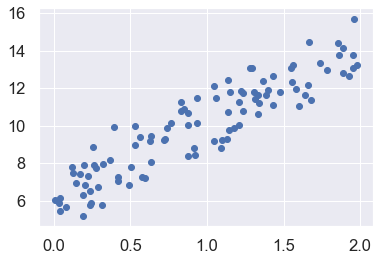

In [3]:
plt.scatter(X,y)

In [4]:
#sns.scatterplot(x=X,y=y)

In [5]:
# sns.regplot(x=X,y=y,)

In [6]:
# sns.residplot(X,y,lowess=True)

- 전체적인 개념 설명

각각의 값들과 가장 가까이에 있는 선형적인 선을 찾는 것이다.

1. 각각의 값들과 가장 가까이에 있는 = 잔차제곱합이 최소되는
  1) 잔차제곱합은 실제값(y)에서 예측값(y_pred = w1*x + w0)의 값의 차이를 제곱한 것이다.
2. 선형적인 선 = w1*x + w0 으로 1차함수

결론적으로, 모든 잔차제곱합의 평균이 최소가 되는 1차함수(w1, w0)를 찾아내는 것이다.

- 어떻게 찾아낼까?
사람의 경우 인수분해식으로 찾아내지만, 컴퓨터의 경우 '경사하강법'이라는 것을 사용한다.
경사하강법은 점점 내려가면서 기울기가 0의 값을 찾는 것이다.

잔차제곱합이 최저의 값을 갖기위해선 잔차의 제곱을 미분했을때 기울기가 0이 되었을떄 최저이 된다.
1) 잔차제곱합이 최저라는 것은 기본적으로 y - y_pred가 최저가 0에 가까워야 한다.
2) w1, w0의 변수가 있으므로 각각 미분(편미분) 한다.
3) w1, w0 값에 편미분한 w1, w0을 더하고 빼면서 잔차제곱합이 최저일때의 값을 찾는다.

결론적으로, 잔차제곱합을 미분하여 0이 나올때가 최저값이며 'w1, w0에 미분한 값을 더하고 빼면서' 잔차제곱합이 최저값이 나올때 까지 돌린다.

In [12]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [18]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for ind in range(iters):
        w1_update, w2_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [14]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [16]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{:.3f} w0:{:.3f}".format(w1[0,0], w[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Desent Total Cost:{:.4f}'.format(get_cost(y,y_pred)))

TypeError: 'float' object is not callable

NameError: name 'y_pred' is not defined

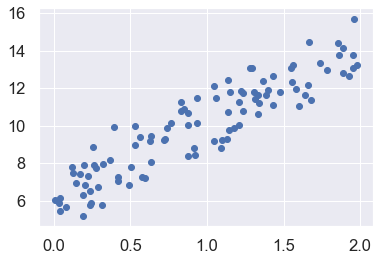

In [17]:
plt.scatter(X, y)
plt.plot(X, y_pred)

경사하강법은 시간이 많이 걸리므로 확률적 경사하강법 or 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다.

In [25]:
def stochastic_gradient_decent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iter):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
    
        w1_update, w2_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [28]:
w1, w0 = stochastic_gradient_decent_steps(X, y, iters=1000)
print('w1:', rount(w1[0,0], 3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{:.4f}'.format(get_cost(y, y_pred)))

TypeError: 'builtin_function_or_method' object cannot be interpreted as an integer